<a href="https://colab.research.google.com/github/Hetvi-624/AI-ML-Internship/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import csv
from collections import Counter

In [154]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [156]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [157]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [158]:
df.shape

(891, 12)

In [159]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [160]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [161]:
df.isna().any()

,0
PassengerId,False
Survived,False
Pclass,False
Name,False
Sex,False
Age,True
SibSp,False
Parch,False
Ticket,False
Fare,False


In [162]:
#find missing value percentage
missing_percentage = (df.isna().sum() / len(df)) * 100
print("\\nPercentage of missing values:")
print(missing_percentage)

\nPercentage of missing values:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [163]:
# Replace values in Embarked column
df["Embarked"] = df["Embarked"].replace({"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Cherbourg


In [164]:
#remove prefix of ticket column
import re
def remove_ticket_prefix(ticket):
    return re.sub(r'[^0-9]', '', ticket)  # Remove non-numeric characters
df['Ticket'] = df['Ticket'].astype(str).apply(remove_ticket_prefix)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6607,23.4500,NaN,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Cherbourg


In [165]:
#remove suffix from cabin values and keep only alphabets
import re
def clean_cabin(value):
    if pd.isna(value):#Keep NaN values unchanged
        return np.nan
    return re.sub(r'[^A-Za-z]', '', str(value))  # Remove numbers and keep only letters
df["Cabin"] = df["Cabin"].apply(clean_cabin)
df[["Cabin"]].head()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6607,23.4500,NaN,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Cherbourg


In [166]:
df['Fare'].value_counts()

,count
Fare,
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
...,...
35.0000,1
28.5000,1
6.2375,1


In [167]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6607,23.4500,NaN,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Cherbourg


#Plot stacked bar chart for fare and cabin column

In [168]:
fare_bins = [0, 50, 100, 150, 200, 250, 300, 550]  # Use original fare_bins
df['Fare_Category'] = pd.cut(df['Fare'], bins=fare_bins, right=False)

In [169]:
# Group columns 'Fare_Category' and 'Cabin'
df_grouped = df.groupby(['Fare_Category', 'Cabin']).size().unstack(fill_value=0)

<ipython-input-169-61004a023a82>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['Fare_Category', 'Cabin']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

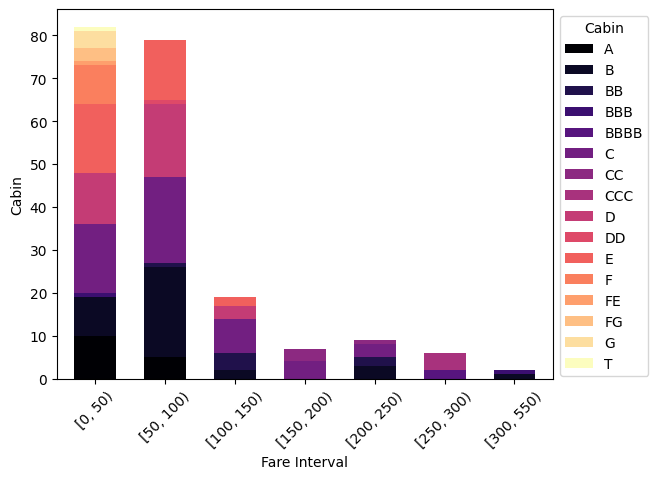

In [170]:
# Plot the data
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True, colormap='magma', width=0.6)
plt.xlabel('Fare Interval')
plt.ylabel('Cabin')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Cabin", bbox_to_anchor=(1, 1), loc="best")
plt.show()

In [171]:
df['Fare_Category']

,Fare_Category
0,"[0, 50)"
1,"[50, 100)"
2,"[0, 50)"
3,"[50, 100)"
4,"[0, 50)"
...,...
886,"[0, 50)"
887,"[0, 50)"
888,"[0, 50)"
889,"[0, 50)"


In [172]:
df['Fare_Category'].value_counts()

,count
Fare_Category,
"[0, 50)",730
"[50, 100)",108
"[100, 150)",24
"[200, 250)",11
"[150, 200)",9
"[250, 300)",6
"[300, 550)",3


In [173]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,NaN,Southampton,"[0, 50)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,Cherbourg,"[50, 100)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,NaN,Southampton,"[0, 50)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,Southampton,"[50, 100)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,"[0, 50)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton,"[0, 50)"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,Southampton,"[0, 50)"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6607,23.4500,NaN,Southampton,"[0, 50)"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Cherbourg,"[0, 50)"


In [174]:
df['Cabin'].isnull().sum()

687

#Plot missing values in cabin column




In [175]:
df['Cabin'].fillna("U",inplace=True)
df

<ipython-input-175-e49d6cf3a690>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna("U",inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,U,Southampton,"[0, 50)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,Cherbourg,"[50, 100)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,U,Southampton,"[0, 50)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,Southampton,"[50, 100)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,Southampton,"[0, 50)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,Southampton,"[0, 50)"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,Southampton,"[0, 50)"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6607,23.4500,U,Southampton,"[0, 50)"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Cherbourg,"[0, 50)"


In [176]:
#create bins of fare column
fare_bins = [0, 50, 100, 150, 200, 250, 300, 550]
df['Fare_Category'] = pd.cut(df['Fare'], bins=fare_bins, right=False)

In [177]:
# Group columns 'Fare_Category' and 'Cabin'
df_grouped = df.groupby(['Fare_Category', 'Cabin']).size().unstack(fill_value=0)

<ipython-input-177-61004a023a82>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['Fare_Category', 'Cabin']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

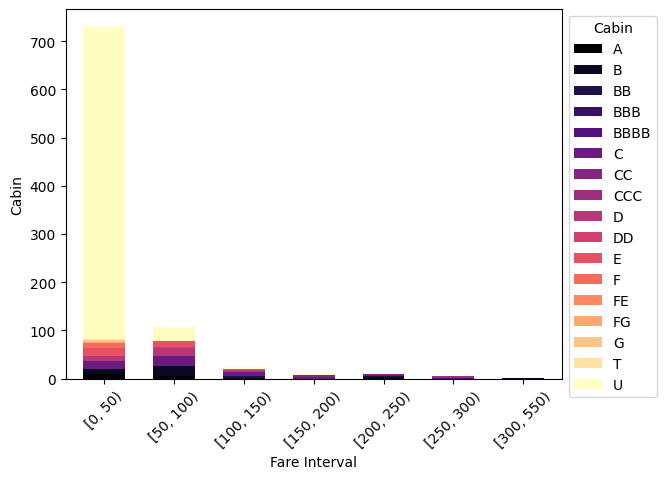

In [178]:
# Plot the data
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True, colormap='magma', width=0.6)
plt.xlabel('Fare Interval')
plt.ylabel('Cabin')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Cabin", bbox_to_anchor=(1, 1), loc="best") #set box as best as possible
plt.show()

#Plot stacked bar chart for age nd sex column

<ipython-input-179-9957a643f2a7>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped=df.groupby(['Sex','Age']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

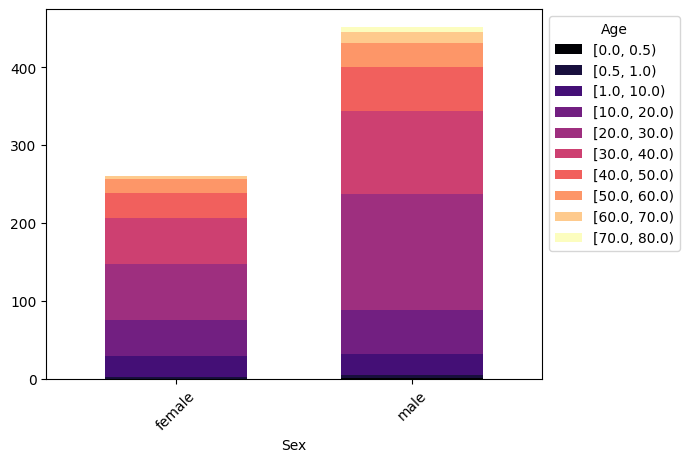

In [179]:
age_bins = [0,0.5,1,10,20,30,40,50,60,70,80]
df['Age'] = pd.cut(df['Age'], bins=age_bins, right=False)
df_grouped=df.groupby(['Sex','Age']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True, colormap='magma', width=0.6)
plt.xlabel('Sex')
#plt.ylabel('Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Age", bbox_to_anchor=(1, 1), loc="best")
plt.show()

In [180]:

df['Age'].isna().sum()

178

In [181]:
print(df["Age"].dtype)

category


#Plot missing values of age column

In [182]:
# Check if 99 is already a category

if 99 not in df["Age"].cat.categories: # Changed  99 to align with the fillna value
    df["Age"] = df["Age"].cat.add_categories([99])  # add_categories expects a list
df["Age"].fillna(99, inplace=True) # Fill NaN values with 99

<ipython-input-182-5eb2215a1878>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(99, inplace=True) # Fill NaN values with 99


In [183]:
df['Age']

,Age
0,"[20.0, 30.0)"
1,"[30.0, 40.0)"
2,"[20.0, 30.0)"
3,"[30.0, 40.0)"
4,"[30.0, 40.0)"
...,...
886,"[20.0, 30.0)"
887,"[10.0, 20.0)"
888,99
889,"[20.0, 30.0)"


In [194]:

age_bins = [0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = [f'{age_bins[i]}-{age_bins[i+1]-1}' for i in range(len(age_bins)-1)]

# Apply binning with labels
df['Age_Binned'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Grouping data
df_grouped = df.groupby(['Sex', 'Pclass', 'Age_Binned']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True, colormap='magma', width=0.6)
plt.xlabel('Sex and class')
#plt.ylabel('Age')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Age", bbox_to_anchor=(1, 1), loc="best")
plt.show()

TypeError: '<' not supported between instances of 'float' and 'pandas._libs.interval.Interval'

In [185]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,NaN,1,0,521171,7.2500,U,Southampton,"[0, 50)",NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,NaN,1,0,17599,71.2833,C,Cherbourg,"[50, 100)",NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,0,0,23101282,7.9250,U,Southampton,"[0, 50)",NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,53.1000,C,Southampton,"[50, 100)",NaN
4,5,0,3,"Allen, Mr. William Henry",male,NaN,0,0,373450,8.0500,U,Southampton,"[0, 50)",NaN


#Plot stacked bar chart for fare and embarked column

<ipython-input-186-88edbe2224ad>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped=df.groupby(['Fare_Category','Sex','Embarked']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

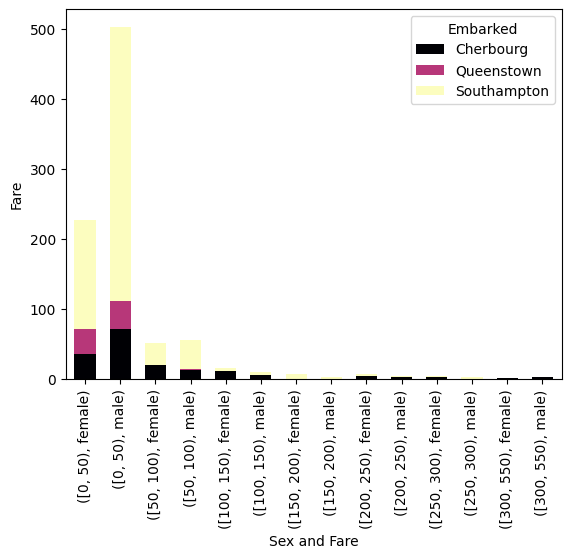

In [186]:
fare_bins = [0, 50, 100, 150, 200, 250, 300, 550]
df['Fare_Category'] = pd.cut(df['Fare'], bins=fare_bins, right=False)
df_grouped=df.groupby(['Fare_Category','Sex','Embarked']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True, colormap='magma', width=0.6)
plt.xlabel('Sex and Fare')
plt.ylabel('Fare')
#plt.xticks(rotation=45)
plt.legend(title="Embarked", bbox_to_anchor=(1, 1), loc="best")
plt.show()

In [187]:
df['Embarked'].isna().sum()

2

In [188]:
#find grouped median
df_grouped=df.groupby(['Pclass','Sex'])
grouped_median=df_grouped['Age'].median()
print(grouped_median)

TypeError: category dtype does not support aggregation 'median'